# ITD140 Assignment 4: Data Preparation and Feature Engineering - 100 points

The goal of this assignment is to provide an in-depth understanding of the initial steps for successfully completing a machine learning project. The assignment assumes the student has mastered the contnent of a college level basic statistics course, has completed or is concurrently enrolled in a Python programming course, or has completed another modern language programming course and has the skills required to consult Python programming documentation to complete the tasks. The assignment is designed to allow the student to understand and explore the dataset used for the remainder of the class, and practice and troubleshoot Python and Jupyter Notebook mechanics.

## EXTREMELY IMPORTANT: Failure to follow these instructions will negatively impact your grade!

1. **NAMING CONVENTION:** Ensure that your submission follows the naming convention `ITD140.W2A2_LnameFIMI`.
   - Example: `ITD140W2A2_WalkerJT`
   - Failure to follow this convention will make it very challenging for me to find your work after I download it for grading or it may be over-written by the work of other students.
   - **I will not search for your work if the naming convention is not followed, and you will receive a zero for this assignment.**
2. **DARK MODE:** Do not submit your work in dark mode, including screenshots! You will loose 50% of your grade.
3. **Ensure Proper Submission:** Follow all instructions carefully to avoid deductions. Use your name as reflected in Canvas, not SIS.

   <b style="color: blue">Last Name:</b> Gerges

   <b style="color: blue">First Name:</b> Adel

   <b style="color: blue">Student ID Number:</b> 8290027

## **Task 1: Explore Dataset Metadata** - 10 points
- Objective: Understand the dataset structure, column names, and data types.
- Instruction: Use `.shape`, `.columns`, and `.dtypes` to display the basic metadata of the `CollegeData.csv` dataset.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

In [11]:
# Insert your code below this text and execute the code.
import pandas as pd

# Load the dataset
dataset_path = r"C:\CollegeData.csv"
college_data = pd.read_csv(dataset_path)

# Display basic metadata
print("Dataset Shape:", college_data.shape)
print("Column Names:", college_data.columns)
print("\nData Types:")
print(college_data.dtypes)

Dataset Shape: (12484, 26)
Column Names: Index(['ALPHAPK', 'GRAD_YR', 'STATUS', 'BLUECHIP', 'CIS_STD', 'HIS_STD',
       'TIS_STD', 'ATH_ECA', 'COMB_ECA', 'CAQPR', 'CMQPR', 'ETHNICITY',
       'MINORITY', 'FEEDER_C', 'GENDER_C', 'MAJOR_C', 'MAJ_GRP', 'OOM',
       'SAT_M', 'SAT_V', 'SERV_ASN', 'COMM_C', 'DEANS_LST', 'DANT_LST',
       'SUPE_LST', 'VARSITY'],
      dtype='object')

Data Types:
ALPHAPK        int64
GRAD_YR        int64
STATUS         int64
BLUECHIP       int64
CIS_STD        int64
HIS_STD        int64
TIS_STD        int64
ATH_ECA        int64
COMB_ECA       int64
CAQPR        float64
CMQPR        float64
ETHNICITY      int64
MINORITY       int64
FEEDER_C       int64
GENDER_C       int64
MAJOR_C        int64
MAJ_GRP        int64
OOM            int64
SAT_M          int64
SAT_V          int64
SERV_ASN       int64
COMM_C       float64
DEANS_LST      int64
DANT_LST       int64
SUPE_LST       int64
VARSITY        int64
dtype: object


## **Task 2: Summarize Key Numerical Variables** - 10 points
- Objective: Calculate summary statistics for numerical columns such as SAT scores and GPAs.
- Instruction: Use `.describe()` to calculate mean, median, and range for selected numerical columns.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

In [12]:
# Insert your code below this text and execute the code.
print(college_data[['SAT_M', 'SAT_V', 'CAQPR', 'CMQPR']].describe())

              SAT_M         SAT_V         CAQPR         CMQPR
count  12484.000000  12484.000000  12484.000000  12484.000000
mean     660.426145    635.182233      2.748017      3.028202
std       61.985999     67.325399      0.721603      0.542291
min      400.000000    230.000000      0.000000      0.000000
25%      620.000000    590.000000      2.390000      2.800000
50%      660.000000    630.000000      2.790000      3.100000
75%      700.000000    680.000000      3.220000      3.370000
max      805.000000    805.000000      4.000000      4.000000


## **Task 3: Visualize Missing Data** - 10 points
- Objective: Detect missing values and visualize their distribution using a heatmap.
- Instruction: Use `Seaborn` to create a heatmap of missing data.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

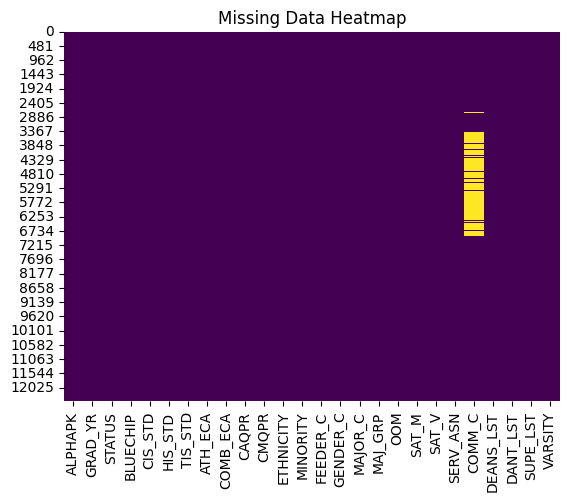

In [13]:
# Insert your code below this text and execute the code.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(college_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

## **Task 4: Visualize Relationships Between Features** - 10 points
- Objective: Explore relationships between numerical features, such as SAT scores, GPAs, and graduation status.
- Instruction: Use `Seaborn's` pairplot function to create scatterplots of numerical features.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

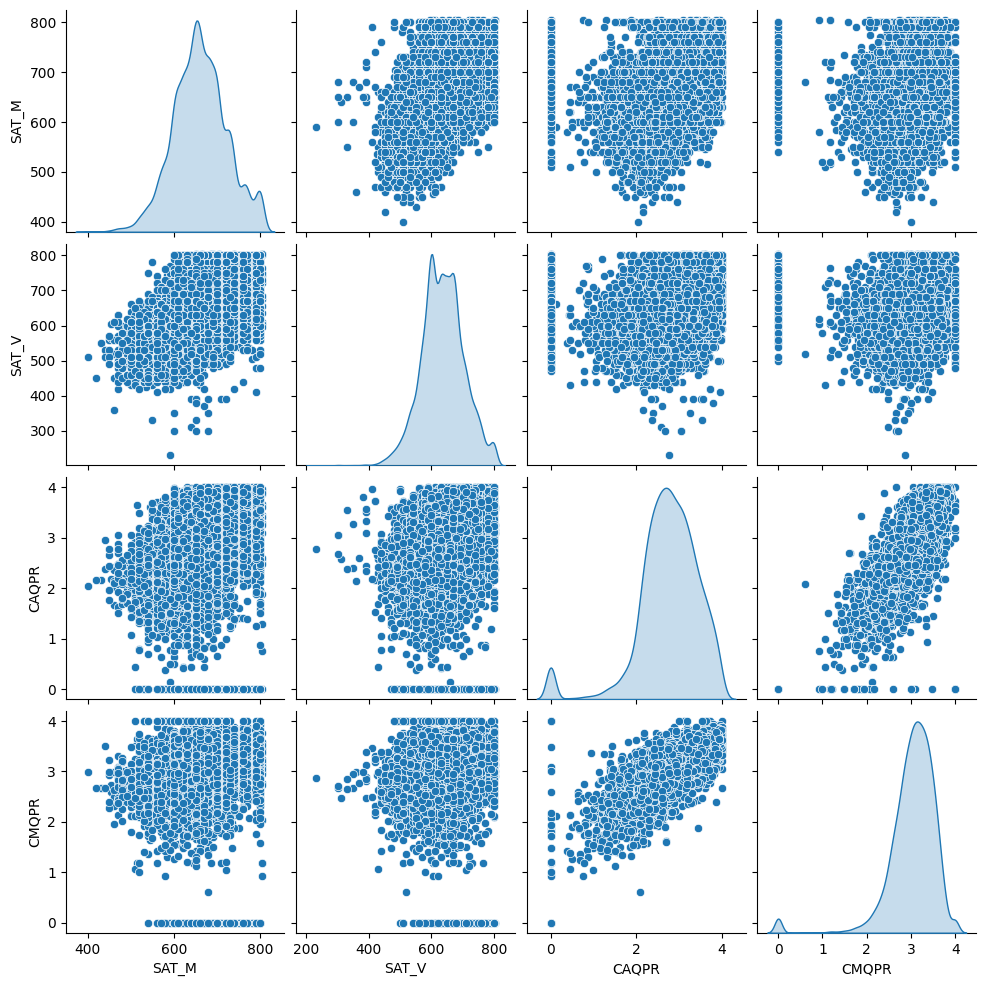

In [14]:
# Insert your code below this text and execute the code.
sns.pairplot(college_data[['SAT_M', 'SAT_V', 'CAQPR', 'CMQPR']], diag_kind='kde')
plt.show()

**Task 5: Detect and Cap Outliers** - 10 Points
- Objective: Detect and cap outliers in numerical columns like `SAT_M`, `SAT_V`, and `CAQPR`.
- Instruction: Use the IQR method to identify outliers and cap them to the IQR bounds. Create boxplots to visualize outliers before and after capping.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

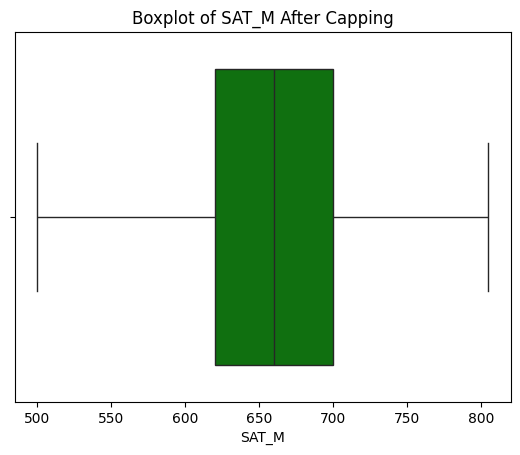

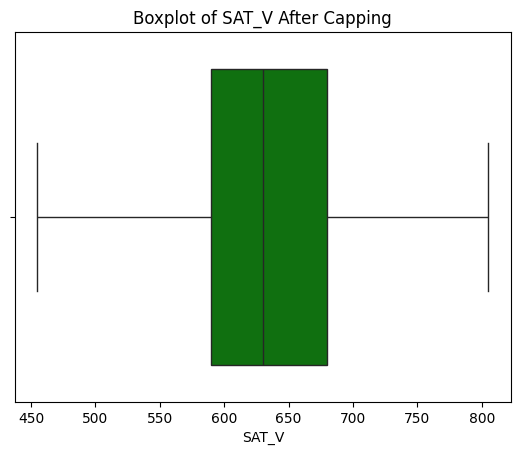

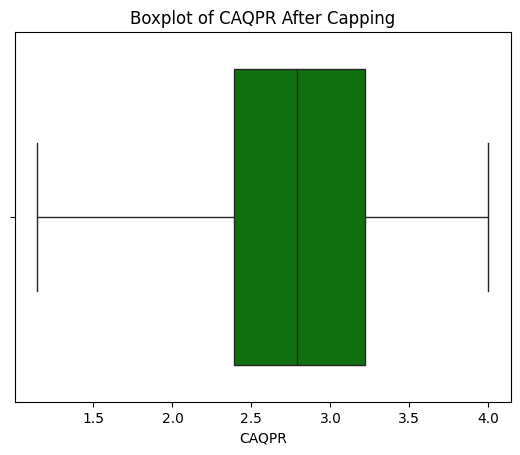

In [15]:
# Insert your code below this text and execute the code.

numerical_columns = ['SAT_M', 'SAT_V', 'CAQPR']
for column in numerical_columns:
    Q1 = college_data[column].quantile(0.25)
    Q3 = college_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    college_data[column] = college_data[column].clip(lower=lower_bound, upper=upper_bound)

    # Visualize
    sns.boxplot(x=college_data[column], color='green')
    plt.title(f"Boxplot of {column} After Capping")
    plt.show()

**Task 6: Normalize and Standardize Features** - 10 Points
- Objective: Normalize and standardize numerical features, such as SAT scores and GPAs.
- Instruction: Use `MinMaxScaler` and `StandardScaler` to transform the data and visualize the distributions.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

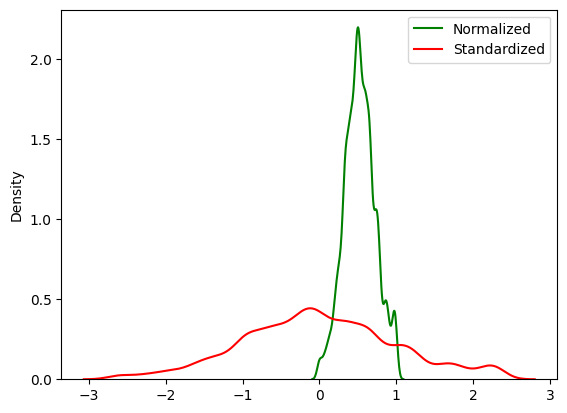

In [16]:
# Insert your code below this text and execute the code.

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

numerical_columns = ['SAT_M', 'SAT_V', 'CAQPR']
df_normalized = scaler_norm.fit_transform(college_data[numerical_columns])
df_standardized = scaler_std.fit_transform(college_data[numerical_columns])

sns.kdeplot(df_normalized[:, 0], label='Normalized', color='green')
sns.kdeplot(df_standardized[:, 0], label='Standardized', color='red')
plt.legend()
plt.show()

**Task 7: Split the Dataset** - 10 Points
- Objective: Split the `CollegeData.csv` dataset into training (70%), testing (20%), and validation (10%) subsets.
- Instruction: Use `train_test_split` and compute basic statistics for each subset.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

In [17]:
# Insert your code below this text and execute the code.

from sklearn.model_selection import train_test_split

X = college_data.drop(columns=['STATUS'])
y = college_data['STATUS']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print("Validation Set Shape:", X_val.shape)

Training Set Shape: (8738, 25)
Testing Set Shape: (2497, 25)
Validation Set Shape: (1249, 25)


**Task 8: Apply Feature Selection** - 10 Points
- Objective: Use `SelectKBest` to select the top 3 features for predicting graduation status (`STATUS`).
- Instruction: Rank features by importance using `f_regression` and visualize the results in a bar chart.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

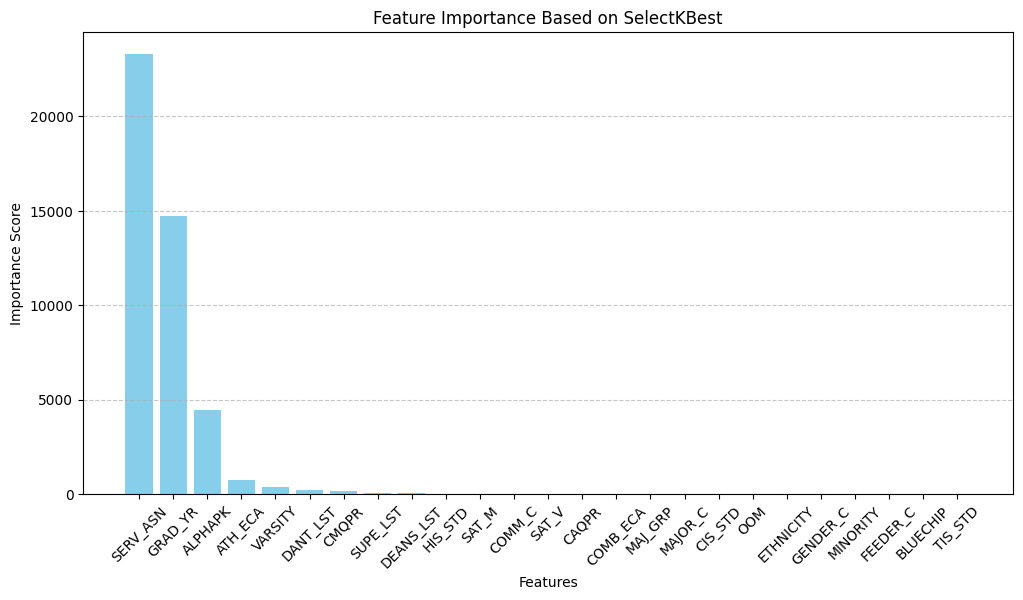

In [18]:
# Insert your code below this text and execute the code.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Load the Auto MPG dataset
file_path = r"C:\CollegeData.csv"
df = pd.read_csv(file_path)

# Step 1: Handle missing values
# Identify non-numeric columns (if any) and drop them
non_numeric_columns = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(columns=non_numeric_columns)

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Step 2: Define features (X) and target (y)
X = df_imputed.drop(columns=['STATUS'])  # Replace 'STATUS' with the actual target column name
y = df_imputed['STATUS']

# Step 3: Apply SelectKBest to rank features
selector = SelectKBest(score_func=f_regression, k=3)  # Select top 3 features
X_new = selector.fit_transform(X, y)

# Extract feature scores and names
feature_scores = selector.scores_
feature_names = X.columns

# Combine feature scores with their names into a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)

# Step 4: Visualize feature importance with a bar chart
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Score'], color='skyblue')
plt.title('Feature Importance Based on SelectKBest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Task 9: Create a Correlation Heatmap** - 10 Points
- Objective: Visualize correlations between numerical features.
- Instruction: Use `.corr()` to calculate correlation coefficients and `Seaborn` to create a heatmap.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

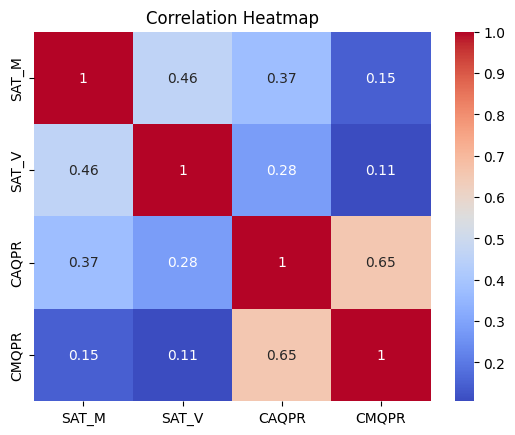

In [19]:
# Insert your code below this text and execute the code.

correlations = college_data[['SAT_M', 'SAT_V', 'CAQPR', 'CMQPR']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Task 10: Visualize GPA Trends by Graduation Year** - 10 Points
- Objective: Analyze trends in GPA (CAQPR) over graduation years (GRAD_YR).
- Instruction: Use Matplotlib to create a line plot showing trends in average GPA for each graduation year.
- 
### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

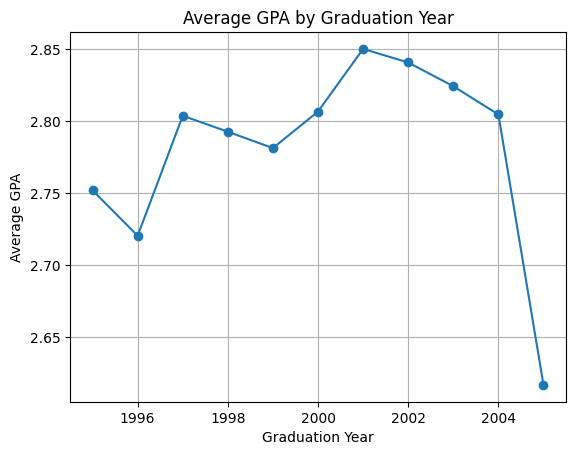

In [20]:
# Insert your code below this text and execute the code.

avg_gpa_by_year = college_data.groupby('GRAD_YR')['CAQPR'].mean()

plt.plot(avg_gpa_by_year.index, avg_gpa_by_year.values, marker='o')
plt.title("Average GPA by Graduation Year")
plt.xlabel("Graduation Year")
plt.ylabel("Average GPA")
plt.grid(True)
plt.show()

## Submission Instructions
1. Save this notebook with all your outputs included.
2. Download `[File | Download]`the notebook, **in the prescribed file naming convention.**
3. Submit the notebook file (`.ipynb`) to Canvas by the due date. You may also want to upload a PDF version of the assignment by opening the notebook in JupyterLab (see icon on top right of Jupyter Notebook environment) and `File | Print | Save as PDF`.
4. Ensure all steps are completed and all required screenshots are included.